# Modules :

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Import DataSet
**Data Set Information:**

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.


In [ ]:
data = pd.read_csv("online_shoppers_intention.csv")

In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

* Administrative: This is the number of pages of this type (administrative) that the user visisted. 
* Administrative_Duration: This is the amount of time spent in this category of pages
* Informational: This is the number of pages of this type (informational) that the user visited.
* Informational_Duration: This is the amount of time spent in this category of pages.
* Product Related: This is the number of pages of this type (product related) that the user visited.
* Product Related Duration: This is the amount of time spent in this category of pages
* Bounce Rate is the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
* Exit Rate is calculated as for all pageviews to the page, the percentage that were the last in the session.
* Page Value represents the average value for a web page that a user visited before completing an e-commerce transaction.
* Special Day indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Data Information

### Elements

In [ ]:
data.sample(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4584,0,0.000000,0,0.0,68,3177.791667,0.005970,0.011488,0.0,0.0,May,2,4,4,4,Returning_Visitor,False,False
7409,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,Jul,3,2,1,1,Returning_Visitor,False,False
9972,0,0.000000,0,0.0,63,1361.203175,0.000000,0.014762,0.0,0.0,Nov,2,2,7,2,Returning_Visitor,False,False
8146,7,60.291667,0,0.0,8,108.500000,0.013333,0.048667,0.0,0.0,Dec,2,2,2,6,Returning_Visitor,False,False


### Features informations

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Features Distribution

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Unknown Data

In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Data Visualisation

### Graph 1 : Labels Class

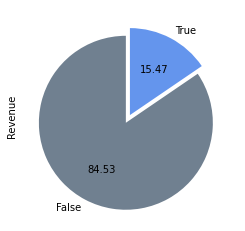

In [ ]:
data.Revenue.value_counts().plot(kind='pie',autopct='%1.2f',startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])

### Graph 2 : Correlation

In [ ]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.00,0.60,0.38,0.26,0.43,0.37,-0.22,-0.32,0.10,-0.09,-0.01,-0.03,-0.01,-0.03,0.03,0.14
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.36,-0.14,-0.21,0.07,-0.07,-0.01,-0.02,-0.01,-0.01,0.01,0.09
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.12,-0.16,0.05,-0.05,-0.01,-0.04,-0.03,-0.03,0.04,0.10
Informational_Duration,0.26,0.24,0.62,1.00,0.28,0.35,-0.07,-0.11,0.03,-0.03,-0.01,-0.02,-0.03,-0.02,0.02,0.07
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.20,-0.29,0.06,-0.02,0.00,-0.01,-0.04,-0.04,0.02,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.00,-0.18,-0.25,0.05,-0.04,0.00,-0.01,-0.03,-0.04,0.01,0.15
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,1.00,0.91,-0.12,0.07,0.02,-0.02,-0.01,0.08,-0.05,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.00,-0.17,0.10,0.01,-0.00,-0.01,0.08,-0.06,-0.21
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,1.00,-0.06,0.02,0.05,0.01,0.01,0.01,0.49
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.10,-0.06,1.00,0.01,0.00,-0.02,0.05,-0.02,-0.08


### Graph 3 : Number of visitors by Month

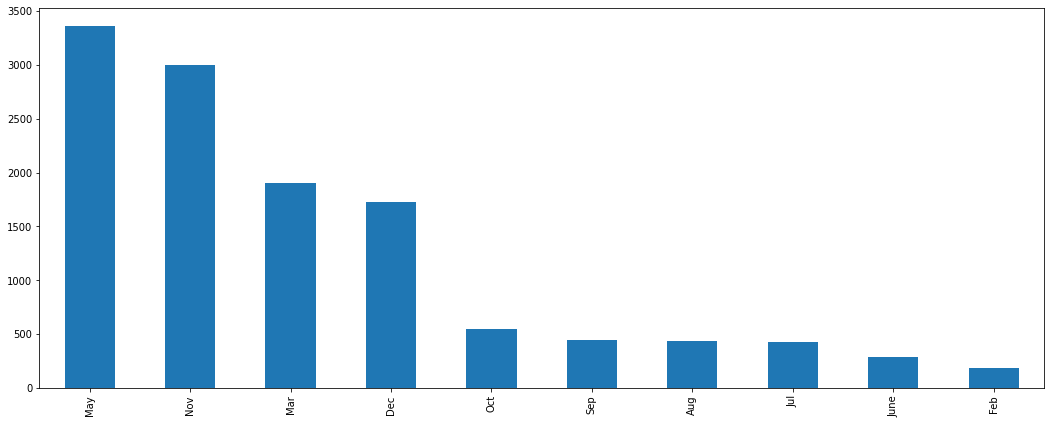

In [ ]:
plt.figure(figsize = (18,7))
data['Month'].value_counts().plot(kind = "bar")
plt.xticks(rotation = 90)
plt.show()

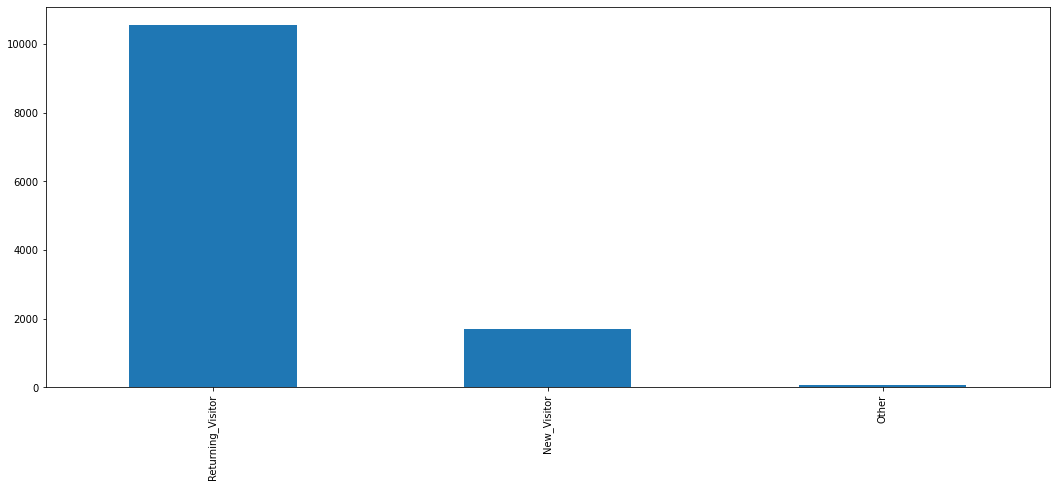

In [ ]:
plt.figure(figsize = (18,7))
data['VisitorType'].value_counts().plot(kind = "bar")

plt.xticks(rotation = 90)
plt.show()

### Graph 4 : Checking the Distribution of customers on Revenue

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


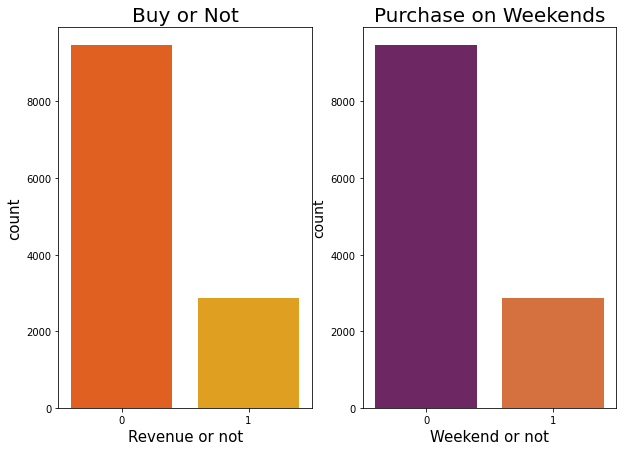

In [ ]:
plt.figure(figsize = (10,7))

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'autumn')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 14,rotation = 90)

plt.show()

# Data Preprocessing 

### Define Target 

In [ ]:
data['Weekend'] = data['Weekend'].map({False:0, True:1})
data['Revenue'] = data['Revenue'].map({False:0, True:1})

In [ ]:
y=data.Revenue
X=data.drop("Revenue",axis=1)

In [ ]:
X1=pd.get_dummies(X,columns=['VisitorType'],drop_first=True)                 
X1=X1.drop("Month",axis=1)

In [ ]:
X=pd.get_dummies(X,columns=['VisitorType'],drop_first=True)                 
X=pd.get_dummies(X,columns=['Month'],drop_first=True)

In [ ]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

### Data Normalization


In [ ]:
scaled = StandardScaler().fit_transform(X)

In [ ]:
scaled = pd.DataFrame(data=scaled, columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep'])

In [ ]:
scaled.sample(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
1580,-0.696993,-0.457191,-0.396478,-0.244931,-0.083903,0.003791,-0.457683,-0.592393,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,1.473393,-0.550552,-0.083316,0.410621,-0.403582,-0.123081,-0.190548,-0.154649,2.337874,-0.612532,-0.566798,-0.215871,-0.194175
1398,-0.395938,-0.332737,-0.396478,-0.244931,-0.241299,-0.269897,-0.457683,-0.621345,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,-0.514182,-0.550552,-0.083316,-2.435336,-0.403582,-0.123081,-0.190548,-0.154649,2.337874,-0.612532,-0.566798,-0.215871,-0.194175


In [ ]:
scaled.isnull().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Weekend                          0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
dtype: int64

# Machine Learning Models

### Data Split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=2)

In [ ]:
Xscaled_train,Xscaled_test,yscaled_train,yscaled_test= train_test_split(scaled,y,test_size=0.3, random_state=2)

In [ ]:
X1_train,X1_test,y1_train,y1_test= train_test_split(X1,y,test_size=0.3, random_state=2)

## Decision Tree

### With data without normalization

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
Dec_Tree_pred=clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

0.8527980535279805

### With data with normalization

In [ ]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(Xscaled_train, yscaled_train)
Dec_Tree1_pred=clf1.predict(Xscaled_test)

In [ ]:
clf1.score(Xscaled_test,yscaled_test)

0.8532035685320357

### Saving the Accuracy

In [ ]:
Dec_Tree = round(accuracy_score(y_test, Dec_Tree_pred)*100,2)
print("Decision Tree model accuracy(in %):", Dec_Tree)

Decision Tree model accuracy(in %): 85.28


In [ ]:
Dec_Tree1 = round(accuracy_score(yscaled_test, Dec_Tree1_pred)*100,2)
print("Decision Tree model accuracy(in %):", Dec_Tree1)

Decision Tree model accuracy(in %): 85.32


## Naive Bayes Classifier 

### With data without normalization

In [ ]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
NB_gaussian = round(gnb.score(X_test,y_test)*100,2)
print("Decision Tree model accuracy(in %):", NB_gaussian)

Decision Tree model accuracy(in %): 81.54


### With data with normalization

In [ ]:
gnb1 = GaussianNB() 
gnb1.fit(Xscaled_train, yscaled_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
NB_gaussian1 = round(gnb1.score(Xscaled_test,yscaled_test)*100,2)
print("Decision Tree model accuracy(in %):", NB_gaussian1)

Decision Tree model accuracy(in %): 71.29


## Random Forest

### With data without normalization

Create the parameter grid to reach a better model

In [ ]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [10,2],
    'criterion':['gini','entropy'],
    'n_estimators': [139,500,750]
}

In [ ]:
grid_search = GridSearchCV(estimator = rnd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
y_pred_rnd=grid_search.predict(X_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.6min finished


In [ ]:
grid_search.score(X_test,y_test)

0.9088942957556096

With custom parameters

In [ ]:
rnd = RandomForestClassifier(max_depth=10, random_state=2, n_estimators=139)
rnd.fit(X_train, y_train)
rnd_pred=rnd.predict(X_test)

In [ ]:
rnd.score(X_test,y_test)

0.9097053257637199

In [ ]:
Rnd_forest =  round(accuracy_score(yscaled_test, rnd_pred)*100,2)
print('Random Forest Classifier model accuracy(in %):', Rnd_forest)

Random Forest Classifier model accuracy(in %): 90.97


In [ ]:
cm_rnd = confusion_matrix(y_test, rnd_pred)
cm_rnd

array([[3062,  108],
       [ 226,  303]])

### With normalize Data

In [ ]:
rnd1 = RandomForestClassifier(max_depth=10, random_state=2, n_estimators=139)
rnd1.fit(Xscaled_train, yscaled_train)
rnd1_pred=rnd1.predict(Xscaled_test)
rnd1.score(Xscaled_test,yscaled_test)

0.9099756690997567

In [ ]:
Rnd_forest1 =  round(accuracy_score(yscaled_test, rnd1_pred)*100,2)
print('Random Forest Classifier model accuracy(in %):', Rnd_forest1)

Random Forest Classifier model accuracy(in %): 91.0


In [ ]:
cm_rnd_1 = confusion_matrix(y_test, rnd_pred)
cm_rnd_1

array([[3062,  108],
       [ 226,  303]])

## Extra Trees

### Without normalize Data

In [ ]:
param_grid_etc = {
    'bootstrap': ['False','True'],
    'max_depth': [10,2],
    'n_estimators':[150,500,750],
    'criterion':['gini','entropy'],
    'ccp_alpha':[0.0,1.0]
    
}

In [ ]:
etc_grid = ExtraTreesClassifier()

In [ ]:
grid_search_etc= GridSearchCV(estimator = etc, param_grid = param_grid_etc, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_etc.fit(X_train,y_train)
y_pred_etc=grid_search_etc.predict(X_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.6min finished


In [ ]:
grid_search_etc.score(X_test,y_test)

0.8780751554474182

In [ ]:
Etc =  round(grid_search_etc.score(X_test,y_test)*100,2)
print('Random Forest Classifier model accuracy(in %):', Etc)

Random Forest Classifier model accuracy(in %): 87.81


### With normalize Data

In [ ]:
etc1 = ExtraTreesClassifier()

In [ ]:
grid_search_etc1= GridSearchCV(estimator = etc1, param_grid = param_grid_etc, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_etc1.fit(Xscaled_train,yscaled_train)
y_pred_etc1=grid_search_etc1.predict(Xscaled_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.5min finished


In [ ]:
grid_search_etc1.score(Xscaled_test,yscaled_test)

0.8791565287915653

In [ ]:
Etc1 =  round(grid_search_etc1.score(Xscaled_test,yscaled_test)*100,2)
print('Random Forest Classifier model accuracy(in %):', Etc1)

Random Forest Classifier model accuracy(in %): 87.92


## Conclusion

### Decision Tree

In [ ]:
best_DecTree=Dec_Tree1
if (Dec_Tree>Dec_Tree1) : 
  best_DecTree = Dec_Tree
best_DecTree

85.32

### Naive Bayes Classifer

In [ ]:
best_NBC=NB_gaussian1
if (NB_gaussian>NB_gaussian1) : 
  best_NBC = NB_gaussian
best_NBC

81.54

In [ ]:
Rnd_forest

### Random Forest

In [ ]:
best_forest=Rnd_forest1
if (Rnd_forest>Rnd_forest1) : 
  best_forest = Rnd_forest
best_forest

91.0

### Extra Trees

In [ ]:
best_trees=Etc1
if (Etc>Etc1) : 
  best_trees = Etc
best_trees

87.92

### Graphique 

In [ ]:
Labels[values.index(max(values))]

'Rnd Forest'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The best model is Rnd Forest with 91.0 of accuracy


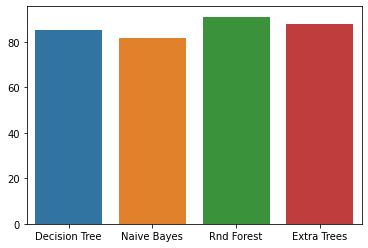

In [ ]:
Labels=["Decision Tree","Naive Bayes","Rnd Forest","Extra Trees"]
values=[best_DecTree,best_NBC,best_forest,best_trees]
sns.barplot(Labels,values)

In [ ]:
print("The best model is {} with {} of accuracy".format(Labels[values.index(max(values))],max(values)))

The best model is Rnd Forest with 91.0 of accuracy
